## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
#
import statsmodels.api as sm
%matplotlib inline
from patsy import dmatrices # design matrix

# Used to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.info()
#sqft_basement is listed as an object for some reason we need to look at this

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df['sqft_basement'].value_counts()
#the question mark is probably doing this, must fix this as a part of data cleaning

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2490.0        1
248.0         1
704.0         1
652.0         1
516.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [7]:
df.describe()
#bedrooms has a crazy outlier, we should remove them
#8 bathrooms also seems excessive

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.isnull().any()
#3 null values we need to deal with

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [9]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
#Make a copy to clean and play around with

#Make the categoricals more usable and use getdummies if not ordinal
#deal with nulls
#Drop data that might not be useful

df_cleaned = df.copy()
df_cleaned

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [11]:
#Categoricals
#waterfront and view also have nulls
#grade and condition dont
df_cleaned['grade'].value_counts()
print(df_cleaned['grade'].unique())

['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']


In [12]:
#get rid of the string values in grade in to make grade more useful as it already has numeric ordinal ranking
df_cleaned['gradeORD'] = df_cleaned['grade'].replace(['7 Average', '6 Low Average','8 Good','11 Excellent','9 Better', '5 Fair',
 '10 Very Good', '12 Luxury', '4 Low', '3 Poor', '13 Mansion'],[7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13])
df_cleaned['gradeORD']
#originally used a lamba function to remove the string part put it kept the datatype as an object so i painstakingly replaced each value by hand lol

0        7
1        7
2        6
3        7
4        8
        ..
21592    8
21593    8
21594    7
21595    8
21596    7
Name: gradeORD, Length: 21597, dtype: int64

In [13]:
#drop this as we no longer need it
df_cleaned.drop(['grade'], axis=1, inplace=True)

In [14]:
#Waterfront has a lot of missing variables, but intuitively it seems that this feature would be important so i'll try to salvage it
df_cleaned['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [15]:
#Again I'm going to replace the yes and no to 1 and zero to make modeling easier
#Im going to fill in the nulls for NO because there are so few yes as it is although this might cause problems

df_cleaned['waterfront'].fillna('NO', inplace=True)
df_cleaned['waterfront'].isnull().any()

False

In [16]:
df_cleaned['waterfront'] = df_cleaned['waterfront'].replace(['NO','YES'],[0, 1])

In [17]:
df_cleaned['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [18]:
df_cleaned['waterfront']

0        0
1        0
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: waterfront, Length: 21597, dtype: int64

In [19]:
#view
df_cleaned['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [20]:
df_cleaned['view'].isnull().any()

True

In [21]:
# filling Nulls with None because again thats the most numerous, and makes most intuitive sense in that a more spectacular or specific view would be obvious
df_cleaned['view'].fillna(value='NONE', inplace=True)

In [22]:
df_cleaned['view'].isnull().any()

False

In [23]:
df_cleaned['view'] = df_cleaned['view'].replace(['NONE', 'AVERAGE', 'FAIR', 'GOOD', 'EXCELLENT'],[1, 2, 3, 4, 5])

In [24]:
df_cleaned['view'].value_counts()

1    19485
2      957
4      508
3      330
5      317
Name: view, dtype: int64

In [25]:
categoricals = ['condition']
dummies = pd.get_dummies(df_cleaned[categoricals], drop_first=True)
dummies

,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,1
4,0,0,0,0
...,...,...,...,...
21592,0,0,0,0
21593,0,0,0,0
21594,0,0,0,0
21595,0,0,0,0


In [26]:
df_cleaned = pd.concat([df_cleaned, pd.get_dummies(df[categoricals])], axis=1)
df_cleaned.drop(['condition'], axis=1, inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21597 non-null  int64  
 1   date                 21597 non-null  object 
 2   price                21597 non-null  float64
 3   bedrooms             21597 non-null  int64  
 4   bathrooms            21597 non-null  float64
 5   sqft_living          21597 non-null  int64  
 6   sqft_lot             21597 non-null  int64  
 7   floors               21597 non-null  float64
 8   waterfront           21597 non-null  int64  
 9   view                 21597 non-null  int64  
 10  sqft_above           21597 non-null  int64  
 11  sqft_basement        21597 non-null  object 
 12  yr_built             21597 non-null  int64  
 13  yr_renovated         17755 non-null  float64
 14  zipcode              21597 non-null  int64  
 15  lat                  21597 non-null 

In [27]:
#Although this seems like a useful predictive feature there are so many nulls im going to drop it
#I could swap out for if the house was renovated or not but that might not be accurate
df_cleaned.drop('yr_renovated', axis=1, inplace=True)
#df.drop('column_name', axis=1, inplace=True)

In [28]:
df_cleaned.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'gradeORD', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good'],
      dtype='object')

In [29]:
#at the beggining we noticed how sqft_basement had ? as a variable making it an object, well lets fix that
df_cleaned.loc[df_cleaned['sqft_basement'] == '?', 'sqft_basement'] = 0 # convert ? to 0
df_cleaned.sqft_basement = df_cleaned.sqft_basement.astype(np.float64) # change from string
df_cleaned['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [30]:
#Multicollinearity
abs(df_cleaned.corr()) > 0.75 # looking to see if any variables have a correlation >= 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,...,lat,long,sqft_living15,sqft_lot15,gradeORD,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


<AxesSubplot:>

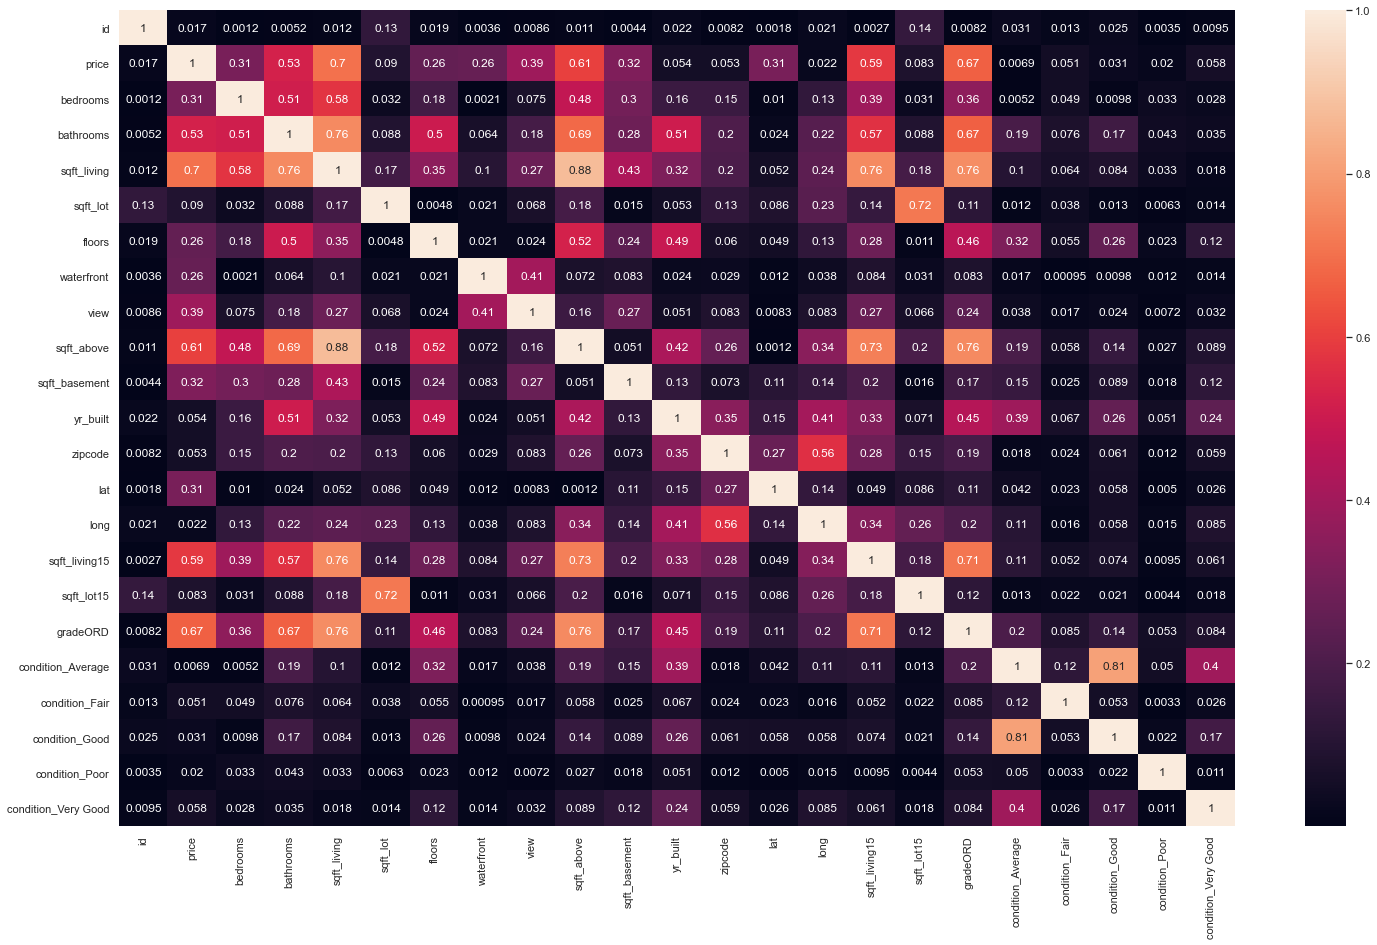

In [31]:
sns.set(rc = {'figure.figsize':(25,15)})
sns.heatmap(df_cleaned.corr().abs(), annot = True)
#I know these are an eyesore but they help with spotting this stuff

In [32]:
cols_to_drop = ['sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'date']
df_cleaned.drop(cols_to_drop, axis=1, inplace=True)

#Unsurprisingly the sqft columns are all interrelated
#date seems unecesarry 

In [33]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21597 non-null  int64  
 1   price                21597 non-null  float64
 2   bedrooms             21597 non-null  int64  
 3   bathrooms            21597 non-null  float64
 4   sqft_living          21597 non-null  int64  
 5   floors               21597 non-null  float64
 6   waterfront           21597 non-null  int64  
 7   view                 21597 non-null  int64  
 8   sqft_basement        21597 non-null  float64
 9   yr_built             21597 non-null  int64  
 10  zipcode              21597 non-null  int64  
 11  lat                  21597 non-null  float64
 12  long                 21597 non-null  float64
 13  gradeORD             21597 non-null  int64  
 14  condition_Average    21597 non-null  uint8  
 15  condition_Fair       21597 non-null 

In [34]:
cols_to_drop2 = ['id', 'price']
house_info = df_cleaned.drop(cols_to_drop2, axis=1)
y = df_cleaned['price']
X = house_info
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

lm = LinearRegression()

lm.fit(X_train, y_train)
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

0.7036730918760945
0.6899470470700556


In [35]:
#get zipcode as dummy data
one_hot = pd.get_dummies(df_cleaned['zipcode'])
# Drop column as it is now encoded
df_cleaned = df_cleaned.drop('zipcode',axis = 1)
# Join the encoded df
df_cleaned = df_cleaned.join(one_hot)
df_cleaned

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_basement,yr_built,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,221900.0,3,1.00,1180,1.0,0,1,0.0,1955,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000.0,3,2.25,2570,2.0,0,1,400.0,1951,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,1.0,0,1,0.0,1933,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,1.0,0,1,910.0,1965,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,1.0,0,1,0.0,1987,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,3.0,0,1,0.0,2009,...,0,0,0,0,0,0,0,0,0,0
21593,6600060120,400000.0,4,2.50,2310,2.0,0,1,0.0,2014,...,1,0,0,0,0,0,0,0,0,0
21594,1523300141,402101.0,2,0.75,1020,2.0,0,1,0.0,2009,...,0,0,0,0,0,0,0,0,0,0
21595,291310100,400000.0,3,2.50,1600,2.0,0,1,0.0,2004,...,0,0,0,0,0,0,0,0,0,0


In [41]:
cols_to_drop2 = ['id', 'price']
house_info = df_cleaned.drop(cols_to_drop2, axis=1)
y = df_cleaned['price']
X = house_info
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

lm = LinearRegression()

lm.fit(X_train, y_train)
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

0.8096704355252874
0.8003697930684459


In [ ]:
#the Zipcode features are significant, maybe i can get rid of the latitude and longitude because they kind of fill that spot in the dataframe as a geographic location

In [44]:
df_cleaned.columns


Index([                 'id',               'price',            'bedrooms',
                 'bathrooms',         'sqft_living',              'floors',
                'waterfront',                'view',       'sqft_basement',
                  'yr_built',                 'lat',                'long',
                  'gradeORD',   'condition_Average',      'condition_Fair',
            'condition_Good',      'condition_Poor', 'condition_Very Good',
                       98001,                 98002,                 98003,
                       98004,                 98005,                 98006,
                       98007,                 98008,                 98010,
                       98011,                 98014,                 98019,
                       98022,                 98023,                 98024,
                       98027,                 98028,                 98029,
                       98030,                 98031,                 98032,
            

In [47]:
geodatadrop = ['lat','long']
df_cleaned.drop(geodatadrop, axis=1, inplace = True)
df_cleaned.columns

Index([                 'id',               'price',            'bedrooms',
                 'bathrooms',         'sqft_living',              'floors',
                'waterfront',                'view',       'sqft_basement',
                  'yr_built',            'gradeORD',   'condition_Average',
            'condition_Fair',      'condition_Good',      'condition_Poor',
       'condition_Very Good',                 98001,                 98002,
                       98003,                 98004,                 98005,
                       98006,                 98007,                 98008,
                       98010,                 98011,                 98014,
                       98019,                 98022,                 98023,
                       98024,                 98027,                 98028,
                       98029,                 98030,                 98031,
                       98032,                 98033,                 98034,
            

In [48]:
cols_to_drop2 = ['id', 'price']
house_info = df_cleaned.drop(cols_to_drop2, axis=1)
y = df_cleaned['price']
X = house_info
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

lm = LinearRegression()

lm.fit(X_train, y_train)
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

0.8094127615031796
0.8004916869480834


In [ ]:
#Nothing really happened according to the scores, in a way its good that it clears up the dataframe from insignificant data

In [52]:
#waterfront is intuitively an important feature, i wonder how much my model will suffer if i were to remove it
cols_to_drop3 = ['id', 'price', 'waterfront']
house_info_no_water = df_cleaned.drop(cols_to_drop3, axis=1)
y = df_cleaned['price']
X = house_info_no_water
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

lm = LinearRegression()

lm.fit(X_train, y_train)
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

0.7910984837783033
0.7838582269428587


In [ ]:
#didnt go down by a crazy amount